Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
diabetes_train |> glimpse()


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 4, 10, 1, 3, 8, 13, 5, 6, 11, 7, 7,…
$ Glucose                  <dbl> 85, 89, 115, 110, 139, 103, 126, 99, 145, 109…
$ BloodPressure            <dbl> 66, 66, 0, 92, 80, 30, 88, 84, 82, 75, 92, 76…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 19, 26, 0, 0, 0, …
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 110, 0, 0, 0, 0, …
$ BMI                      <dbl> 26.6, 28.1, 35.3, 37.6, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 0.191, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 29, 30, 57, 33, 27, 50, 57, 60, 28, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**
In a logistic regression model we are looking to predict categorical outcomes, which are typically classifications. For classic logistic regression models, the most suitable type of variable is one that represents a binary classification. The "Outcome" column in our data looks to be a binary 0 or 1 which meets this need.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description                                                                |
| :---------- | :------------------------------------------------------------------------- |
| Glucose     | Plasma glucose concentration at 2 hours in an oral glucose tolerance test  |
| BMI         | Body mass index (weight in kg/(height in m)^2)                             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

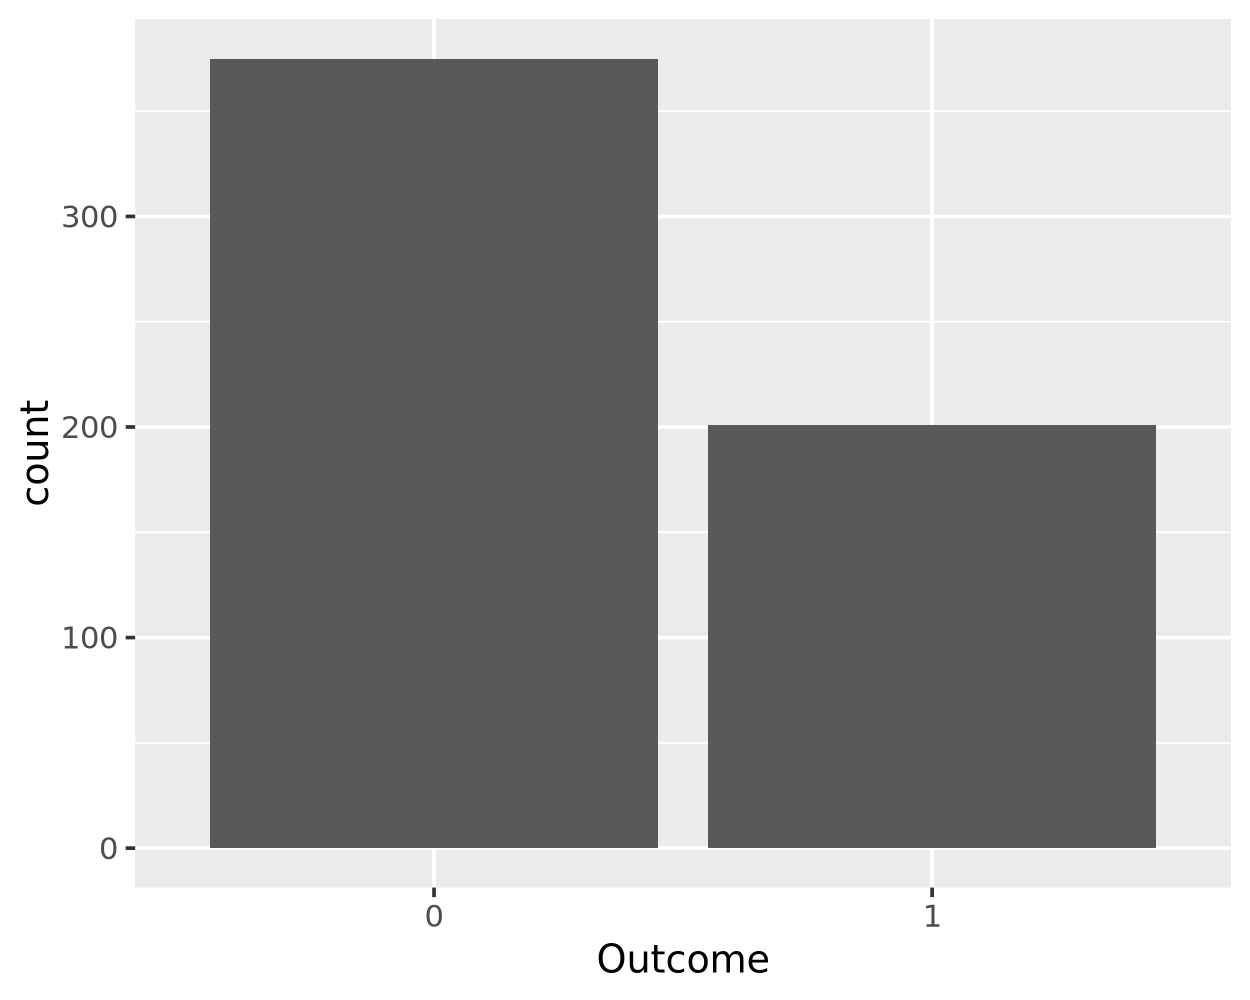

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
       geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**
It appears that we do not have a balanced data set in this case. There are approximately 200 with Outcome = 1 while there are nearly 400 with Outcome = 0.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

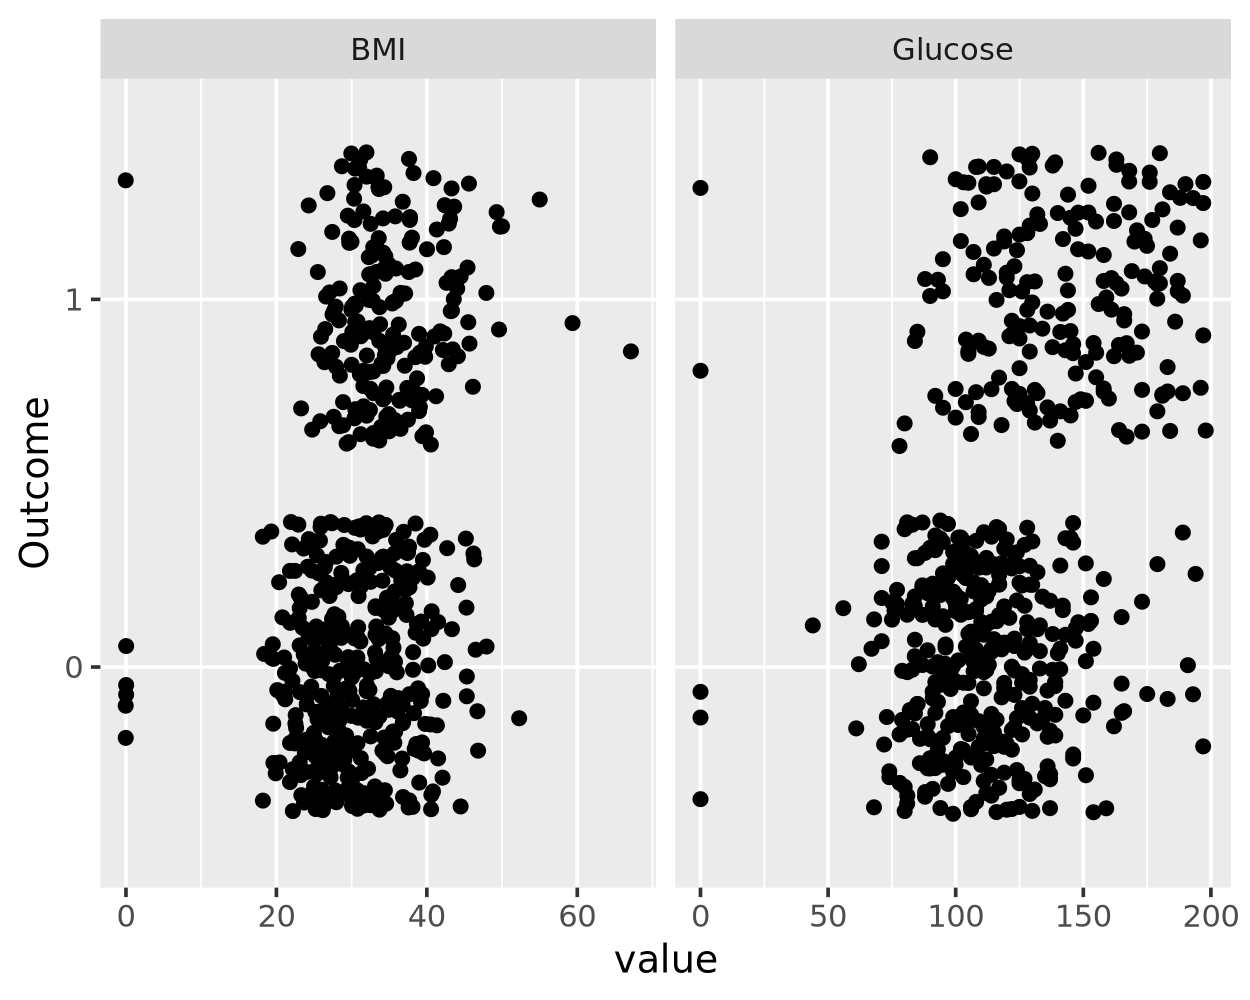

In [10]:
ggplot(plot_df, aes(y=Outcome, x=value)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2, scales = 'free_x')


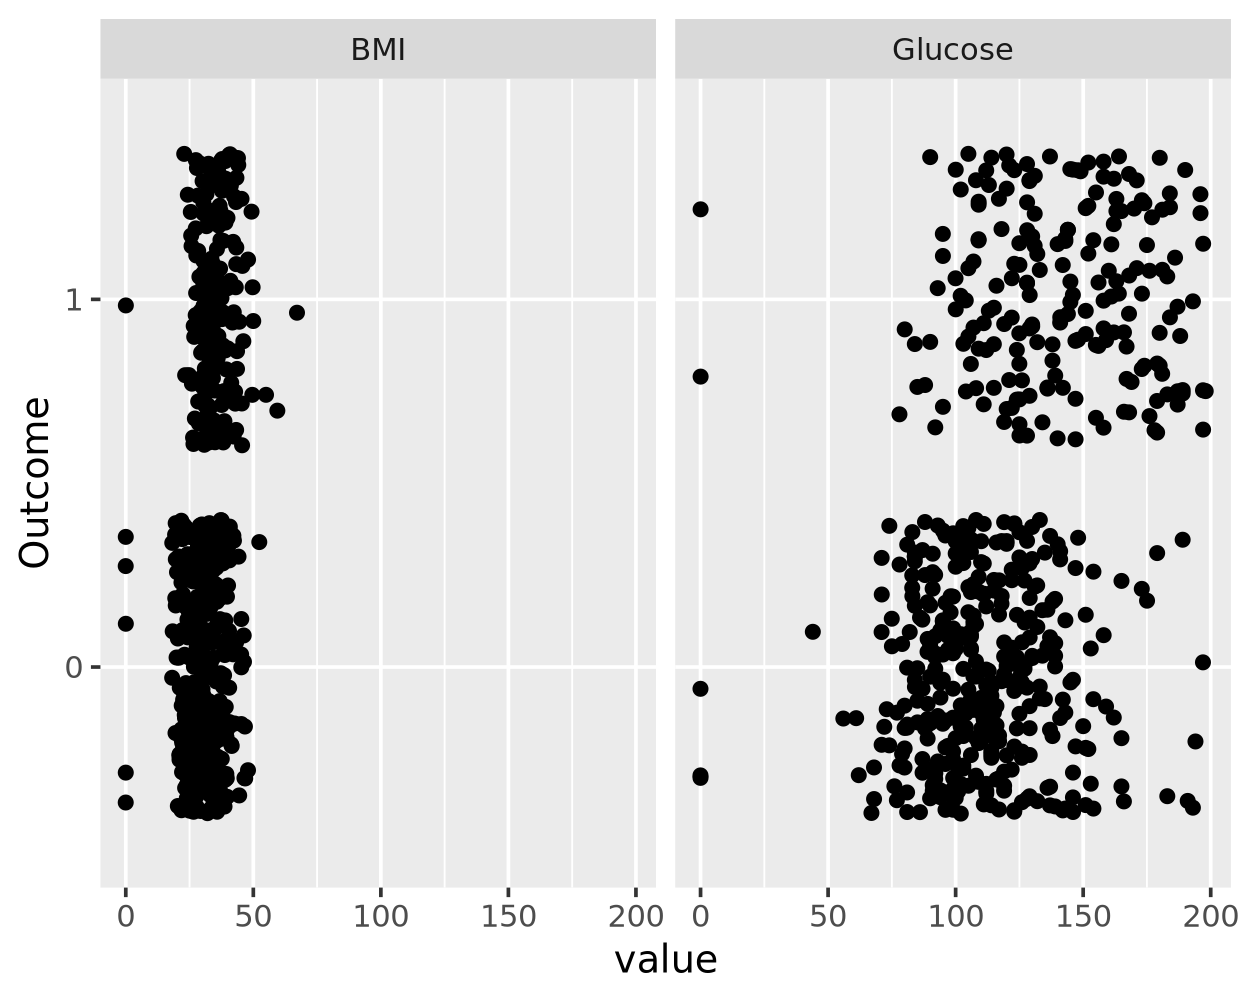

In [11]:
ggplot(plot_df, aes(y=Outcome, x=value)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**
Without the 'scales = 'free_x'' argument in the facet_wrap function, the scales on the x-axis are the same for both BMI and glucose. Since the variability in BMI values is over a smaller range, the data points appear to be more clumped than the glucose values that occur over a much wider range.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [12]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [13]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.8216918,0.17830822,5,116,74,0,0,25.6,0.201,30,0
1,0.4328579,0.56714208,0,118,84,47,230,45.8,0.551,31,1
0,0.6881110,0.31188899,1,115,70,30,96,34.6,0.529,32,1
0,0.7566278,0.24337216,9,119,80,35,0,29.0,0.263,29,1
0,0.9154479,0.08455213,1,97,66,15,140,23.2,0.487,22,0
0,0.6826197,0.31738028,5,117,92,0,0,34.1,0.337,38,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [14]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  30
         1  17  37

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**
- 67 individuals had diabetes in the test data (sum of 1s in the Truth column)
- 37 individuals with diabetes in the test data were predicted to have diabetes by this model (where both Truth and Prediction were 1)
- 17 individuals predicted to have diabetes did not have diabetes (where Prediction = 1 and Truth = 0)